---
## Project DARNA: **D**etection of **A**nomaly in OFW **R**ecruitment Posts thru Recurrent **N**eur**A**l Network
----
###***Capstone Completion Project Submitted by Christian D. Laurio***

## 1. Import packages

In [ ]:
!pip install stopwordsiso

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 73 kB 1.4 MB/s 


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import re
from scipy.spatial.distance import cdist

Import from Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
tf.keras.__version__

'2.9.0'

## 2. Load dataset

In [ ]:
path='https://raw.githubusercontent.com/Atom0890/Project-DARNA/main/Final_DARNA_Dataset.csv'
df=pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Post    248 non-null    object
 1   Risky?  248 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [ ]:
df.head(10)

,Post,Risky?
0,Urgent!!!!!!\nWe’re looking for 2 caregiver st...,1
1,*Looking for Passport Holder bound to Singapor...,1
2,URGENT - URGENT!!!\nBARTENDER\nImmediate Joini...,1
3,## **Job Opportunity in Australia**\n\nWe are ...,1
4,Sino po walang pang gastos dito na gustong mag...,1
5,urgently hiring!!\ndomestic helper \nbound to ...,1
6,I NEED MORE MORE FAMILY LADY DRIVER APPLICANT...,1
7,PTPA. Thanks\n\nPre-Opening Hotel Staff Urgent...,1
8,I NEED MORE MORE FAMILY LADY DRIVER APPLICANT...,1
9,Urgent Hiring Waitress 5'2 in Height 21to32yrs...,1


## 3. Data Cleaning: Remove the symbols, html tags, Tagalog stopwords, English stopwords

In [ ]:
#Remove symbols
df['tidy'] = df['Post'].str.replace("[^a-zA-Z#]", " ")
df.head(10)
df['tidy']=df['tidy'].astype(str)
CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
#Remove html tags
def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext
df['tidy'] = df['tidy'].apply(cleanhtml)

In [ ]:
#Remove Tagalog stopwords
import stopwordsiso as stopwords
stopwords=stopwords.stopwords("tl")
df['tidy'] = df['tidy'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

In [ ]:
#Remove English stopwords
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords 
stop_words = stopwords.words('english') 
df['tidy'] = df['tidy'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df['tidy'] = df['tidy'].apply(lambda x: " ".join(x.lower() for x in x.split()))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Expand english contradictions
contractions_dict = { 'didn\'t': 'did not', 'don\'t': 'do not', "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he had / he would", "he'd've": "he would have", "he'll": "he shall / he will", "he'll've": "he shall have / he will have", "he's": "he has / he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how has / how is / how does", "I'd": "I had / I would", "I'd've": "I would have", "I'll": "I shall / I will", "I'll've": "I shall have / I will have", "I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it had / it would", "it'd've": "it would have", "it'll": "it shall / it will", "it'll've": "it shall have / it will have", "it's": "it has / it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she had / she would", "she'd've": "she would have", "she'll": "she shall / she will", "she'll've": "she shall have / she will have", "she's": "she has / she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "so's": "so as / so is", "that'd": "that would / that had", "that'd've": "that would have", "that's": "that has / that is", "there'd": "there had / there would", "there'd've": "there would have", "there's": "there has / there is", "they'd": "they had / they would", "they'd've": "they would have", "they'll": "they shall / they will", "they'll've": "they shall have / they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we had / we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what shall / what will", "what'll've": "what shall have / what will have", "what're": "what are", "what's": "what has / what is", "what've": "what have", "when's": "when has / when is", "when've": "when have", "where'd": "where did", "where's": "where has / where is", "where've": "where have", "who'll": "who shall / who will", "who'll've": "who shall have / who will have", "who's": "who has / who is", "who've": "who have", "why's": "why has / why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you had / you would", "you'd've": "you would have", "you'll": "you shall / you will", "you'll've": "you shall have / you will have", "you're": "you are", "you've": "you have" } 
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict): 
  def replace(match): 
    return contractions_dict[match.group(0)] 
  return contractions_re.sub(replace, s)
df['tidy'] = df['tidy'].apply(expand_contractions)
df['tidy'] = df['tidy'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
df.head()

,Post,Risky?,tidy
0,Urgent!!!!!!\nWe’re looking for 2 caregiver st...,1,urgent looking caregiver stay clovis californi...
1,*Looking for Passport Holder bound to Singapor...,1,looking passport holder bound singapore decent...
2,URGENT - URGENT!!!\nBARTENDER\nImmediate Joini...,1,urgent urgent bartender immediate joining loca...
3,## **Job Opportunity in Australia**\n\nWe are ...,1,opportunity australia market leader bigger sca...
4,Sino po walang pang gastos dito na gustong mag...,1,sino pang gastos gustong abroad later bound si...


In [ ]:
train_text, val_text, train_label, val_label = \
    train_test_split(df["tidy"].tolist(),
                     df["Risky?"].tolist(),
                     test_size=0.50,
                     shuffle=True,
                     random_state=324)
# Convert to numpy arrays.
train_text = np.array(train_text)
val_text = np.array(val_text)

In [ ]:
print("Train-set size: ", len(train_text))
print("Validation-set size:  ", len(val_text))

Train-set size:  124
Validation-set size:   124


In [ ]:
train_text[50]

'urgent urgent bartender immediate joining local hire experience transferable attractive salary benefits send whatsapp'

In [ ]:
train_label[50]

1

## 4. Tokenizer

A neural network cannot work directly on text-strings so we must convert it somehow. There are two steps in this conversion, the first step is called the "tokenizer" which converts words to integers and is done on the data-set before it is input to the neural network. The second step is an integrated part of the neural network itself and is called the "embedding"-layer.

We may instruct the tokenizer to only use e.g. the 1000 most popular words from the data-set.

In [ ]:
num_words = 1000

In [ ]:
tokenizer = Tokenizer(num_words=num_words)

The tokenizer can then be "fitted" to the data-set. This scans through all the text and strips it from unwanted characters such as punctuation, and also converts it to lower-case characters. The tokenizer then builds a vocabulary of all unique words along with various data-structures for accessing the data.

Note that we fit the tokenizer on the entire data-set so it gathers words from both the training- and test-data. This is OK as we are merely building a vocabulary and want it to be as complete as possible. The actual neural network will of course only be trained on the training-set.

In [ ]:
%%time
#data_text = train_text + val_text
tokenizer.fit_on_texts(train_text)

CPU times: user 9.59 ms, sys: 0 ns, total: 9.59 ms
Wall time: 14.5 ms


In [ ]:
if num_words is None:
    num_words = len(tokenizer.word_index)

In [ ]:
tokenizer.word_index

{'accreditation': 1,
 'regular': 2,
 'human': 3,
 'resources': 4,
 'ephesians': 5,
 'passport': 6,
 'hiring': 7,
 'kuwait': 8,
 'bound': 9,
 'saudi': 10,
 'domestic': 11,
 'free': 12,
 'female': 13,
 'qatar': 14,
 'salary': 15,
 'agency': 16,
 'arabia': 17,
 'recruitment': 18,
 'manpower': 19,
 'urgent': 20,
 'medical': 21,
 'office': 22,
 'years': 23,
 'abroad': 24,
 'with': 25,
 'poea': 26,
 'ready': 27,
 'placement': 28,
 'helper': 29,
 'male': 30,
 'services': 31,
 'corporation': 32,
 'work': 33,
 'oman': 34,
 'lang': 35,
 'employer': 36,
 'interested': 37,
 'only': 38,
 'mojo': 39,
 'driver': 40,
 'worker': 41,
 'experience': 42,
 'applicants': 43,
 'must': 44,
 'https': 45,
 'dubai': 46,
 'holder': 47,
 'first': 48,
 'allowance': 49,
 'hospital': 50,
 'united': 51,
 'deployment': 52,
 'legit': 53,
 'valid': 54,
 'technician': 55,
 'good': 56,
 'upon': 57,
 'international': 58,
 'apply': 59,
 'food': 60,
 'basta': 61,
 'manila': 62,
 'send': 63,
 'libre': 64,
 'workers': 65,
 'ema

We can then use the tokenizer to convert all texts in the training-set to lists of these tokens.

In [ ]:
x_train_tokens = tokenizer.texts_to_sequences(train_text)

For example, here is a text from the training-set:

In [ ]:
train_text[50]

'urgent urgent bartender immediate joining local hire experience transferable attractive salary benefits send whatsapp'

This text corresponds to the following list of tokens:

In [ ]:
np.array(x_train_tokens[50])

array([ 20,  20, 374, 261, 262, 375, 376,  42, 377, 378,  15, 379,  63,
       115])

We also need to convert the texts in the test-set to tokens.

In [ ]:
x_test_tokens = tokenizer.texts_to_sequences(val_text)

## 5. Padding and Truncating Data

The Recurrent Neural Network can take sequences of arbitrary length as input, but in order to use a whole batch of data, the sequences need to have the same length. There are two ways of achieving this: (A) Either we ensure that all sequences in the entire data-set have the same length, or (B) we write a custom data-generator that ensures the sequences have the same length within each batch.

Solution (A) is simpler but if we use the length of the longest sequence in the data-set, then we are wasting a lot of memory. This is particularly important for larger data-sets.

So in order to make a compromise, we will use a sequence-length that covers most sequences in the data-set, and we will then truncate longer sequences and pad shorter sequences.

First we count the number of tokens in all the sequences in the data-set.

In [ ]:
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
np.mean(num_tokens)

22.737903225806452

In [ ]:
np.max(num_tokens)

174

The max number of tokens we will allow is set to the average plus 2 standard deviations.

In [ ]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

69


This covers about 95% of the data-set.

In [ ]:
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9596774193548387

When padding or truncating the sequences that have a different length, we need to determine if we want to do this padding or truncating 'pre' or 'post'. If a sequence is truncated, it means that a part of the sequence is simply thrown away. If a sequence is padded, it means that zeros are added to the sequence.

So the choice of 'pre' or 'post' can be important because it determines whether we throw away the first or last part of a sequence when truncating, and it determines whether we add zeros to the beginning or end of the sequence when padding. This may confuse the Recurrent Neural Network.

In [ ]:
pad = 'pre'

In [ ]:
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens,
                            padding=pad, truncating=pad)

In [ ]:
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens,
                           padding=pad, truncating=pad)

We have now transformed the training-set into one big matrix of integers (tokens) with this shape:

In [ ]:
x_train_pad.shape

(124, 69)

The matrix for the test-set has the same shape:

In [ ]:
x_test_pad.shape

(124, 69)

For example, we had the following sequence of tokens above:

In [ ]:
np.array(x_train_tokens[50])

array([ 20,  20, 374, 261, 262, 375, 376,  42, 377, 378,  15, 379,  63,
       115])

This has simply been padded to create the following sequence. Note that when this is input to the Recurrent Neural Network, then it first inputs a lot of zeros. If we had padded 'post' then it would input the integer-tokens first and then a lot of zeros. This may confuse the Recurrent Neural Network.

In [ ]:
x_train_pad[50]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  20,  20, 374, 261, 262, 375, 376,  42, 377, 378,
        15, 379,  63, 115], dtype=int32)

## 6. Tokenizer Inverse Map

For some strange reason, the Keras implementation of a tokenizer does not seem to have the inverse mapping from integer-tokens back to words, which is needed to reconstruct text-strings from lists of tokens. So we make that mapping here.

In [ ]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

In [ ]:
def tokens_to_string(tokens):
    # Map from tokens back to words.
    words = [inverse_map[token] for token in tokens if token != 0]
    
    # Concatenate all words.
    text = " ".join(words)

    return text

In [ ]:
train_text[50]

'urgent urgent bartender immediate joining local hire experience transferable attractive salary benefits send whatsapp'

In [ ]:
tokens_to_string(x_train_tokens[50])

'urgent urgent bartender immediate joining local hire experience transferable attractive salary benefits send whatsapp'

## 7. Create the Recurrent Neural Network

We are now ready to create the Recurrent Neural Network (RNN). We will use the Keras API for this because of its simplicity.

In [ ]:
model = Sequential()

The first layer in the RNN is a so-called Embedding-layer which converts each integer-token into a vector of values. This is necessary because the integer-tokens may take on values between 0 and 10000 for a vocabulary of 10000 words. The RNN cannot work on values in such a wide range. The embedding-layer is trained as a part of the RNN and will learn to map words with similar semantic meanings to similar embedding-vectors, as will be shown further below.

First we define the size of the embedding-vector for each integer-token. In this case we have set it to 100, so that each integer-token will be converted to a vector of length 100. The values of the embedding-vector will generally fall roughly between -1.0 and 1.0, although they may exceed these values somewhat.

The size of the embedding-vector is typically selected between 100-300, but it seems to work reasonably well with small values for Sentiment Analysis.

In [ ]:
embedding_size = 100

The embedding-layer also needs to know the number of words in the vocabulary (`num_words`) and the length of the padded token-sequences (`max_tokens`). We also give this layer a name because we need to retrieve its weights further below.

In [ ]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='layer_embedding'))

We can now add the first Gated Recurrent Unit (GRU) to the network. This will have 16 outputs. Because we will add a second GRU after this one, we need to return sequences of data because the next GRU expects sequences as its input.

In [ ]:
model.add(GRU(units=16, return_sequences=True))

This adds the second GRU with 8 output units. This will be followed by another GRU so it must also return sequences.

In [ ]:
model.add(GRU(units=8, return_sequences=True))

This adds the third and final GRU with 4 output units. This will be followed by a dense-layer, so it should only give the final output of the GRU and not a whole sequence of outputs.

In [ ]:
model.add(GRU(units=4))

Add a fully-connected / dense layer which computes a value between 0.0 and 1.0 that will be used as the classification output.

In [ ]:
model.add(Dense(1, activation='sigmoid'))

Use the Adam optimizer with the given learning-rate.

In [ ]:
optimizer = Adam(lr=1e-3)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Compile the Keras model so it is ready for training.

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_embedding (Embedding)  (None, 69, 100)          100000    
                                                                 
 gru (GRU)                   (None, 69, 16)            5664      
                                                                 
 gru_1 (GRU)                 (None, 69, 8)             624       
                                                                 
 gru_2 (GRU)                 (None, 4)                 168       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 106,461
Trainable params: 106,461
Non-trainable params: 0
_________________________________________________________________


## 8. Train the Recurrent Neural Network

We can now train the model. Note that we are using the data-set with the padded sequences. We use 5% of the training-set as a small validation-set, so we have a rough idea whether the model is generalizing well or if it is perhaps over-fitting to the training-set.

In [ ]:
%%time
train_label = np.array(train_label)
model.fit(x_train_pad, train_label, 
          validation_split=0.05, epochs=10, batch_size=32)

Epoch 1/10
4/4 [==============================] - 10s 968ms/step - loss: 0.6916 - accuracy: 0.5043 - val_loss: 0.6728 - val_accuracy: 0.7143
Epoch 2/10
4/4 [==============================] - 1s 206ms/step - loss: 0.6712 - accuracy: 0.7350 - val_loss: 0.6530 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 1s 169ms/step - loss: 0.6485 - accuracy: 0.8718 - val_loss: 0.6272 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 1s 202ms/step - loss: 0.6179 - accuracy: 0.9658 - val_loss: 0.5920 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 1s 172ms/step - loss: 0.5768 - accuracy: 0.9915 - val_loss: 0.5436 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 1s 187ms/step - loss: 0.5221 - accuracy: 0.9915 - val_loss: 0.4837 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 1s 165ms/step - loss: 0.4555 - accuracy: 0.9915 - val_loss: 0.4120 - val_accuracy: 1.0000
Epoch 8/10
4/4 [===

## 9. Performance on Test-Set

Now that the model has been trained we can calculate its classification accuracy on the test-set.

In [ ]:
%%time
val_label = np.array(val_label)
result = model.evaluate(x_test_pad, val_label)

4/4 [==============================] - 0s 30ms/step - loss: 0.2851 - accuracy: 0.9597
CPU times: user 182 ms, sys: 7.84 ms, total: 190 ms
Wall time: 236 ms


In [ ]:
print("Accuracy: {0:.2%}".format(result[1]))

Accuracy: 95.97%


## 10. Test New Data

Let us try and classify new texts that we make up. 

In [ ]:
text1 = "We're hiring DOMESTIC HELPER Malaysia, Qatar and Kuwait..we have also for Singapore peru walang cash assistance.#Legit pm me."
text2 = "KUWAIT 1010 EPHESIANS HUMAN RESOURCES INC COLLINS AVENUE CO FOR LADIES HEALTH INSTITUTE & BEAUTY SALON REGULAR ACCREDITATION SPECIALIST HAIR FEMALE"
text3 = "Interested female bound to HONG KONG,MALAYSIA, QATAR, Saudi KUWAIT....NO....PLACEMENT FEE NO...SALARY DEDUCTION."
text4 = "Looking for Caretaker in TAIWAN NO PLACEMENT FEMALE ONLY JUST PM US FOR MORE INFORMATION"
text5 = "SAUDI ARABIA 1010 EPHESIANS HUMAN RESOURCES INC FALAH MEDICAL COMPLEX / FALAH POLYCLINICS REGULAR ACCREDITATION NURSE STAFF"
text6 = "I'm reaching out to share our opening for our Web Researcher position. The rate starts at $5/hr to $7/hr and we offer flexible schedule."
text7 = "Sa Willing to Wait at Sumunod sa Proseso ng South Korea Lang Po Gov.-Gov. Process No Placement Fee Basic Salary:83K-100K+ if Laging OT Male:18-36,Female:18-35 as Factory Worker."
text8 = "Looking for 2 males barista and 2 males chef assistant Bound to saudi"
text9 = "SINGAPORE 1010 EPHESIANS HUMAN RESOURCES INC INTERHELP AGENCY REGULAR ACCREDITATION WORKER DOMESTIC"
text10 = "Looking for pogo online casino agent Thailand base 40k salary Pm me with passport"
texts = [text1, text2, text3, text4, text5, text6, text7, text8, text9, text10]

In [ ]:
tokens = tokenizer.texts_to_sequences(texts)

In [ ]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens,
                           padding=pad, truncating=pad)
tokens_pad.shape

(10, 69)

In [ ]:
model.predict(tokens_pad)

1/1 [==============================] - 0s 27ms/step


array([[0.79285395],
       [0.17504103],
       [0.7956146 ],
       [0.75160867],
       [0.1929076 ],
       [0.49083927],
       [0.71729803],
       [0.53892094],
       [0.21887596],
       [0.6888074 ]], dtype=float32)

A value close to 0.0 means a Low Risk post and a value close to 1.0 means a High Risk job posting. These numbers will vary every time you train the model.

##***Acknowledgement:***
This Capstone project is based on the winning solution submitted by our team during the **DataQuest2022: Gender-responsive Labor Migration** hackathon organized by Cirrolytix in partnership with BRIDGE, Migration Multi-Partner Trust Fund, ILO, IOM UN Migration, UN Women, Data Ethics PH and Foundations for Media Alternatives. 

Other members of the team gave their consents for me to improve on the previous model and use it as my Final Capstone project. Members of the Team DARNA are:


1.   Amee Kristin Ayco
2.   Joshua Bon Roco
1.   Noe Christian Nolasco
1.   Christian D. Laurio







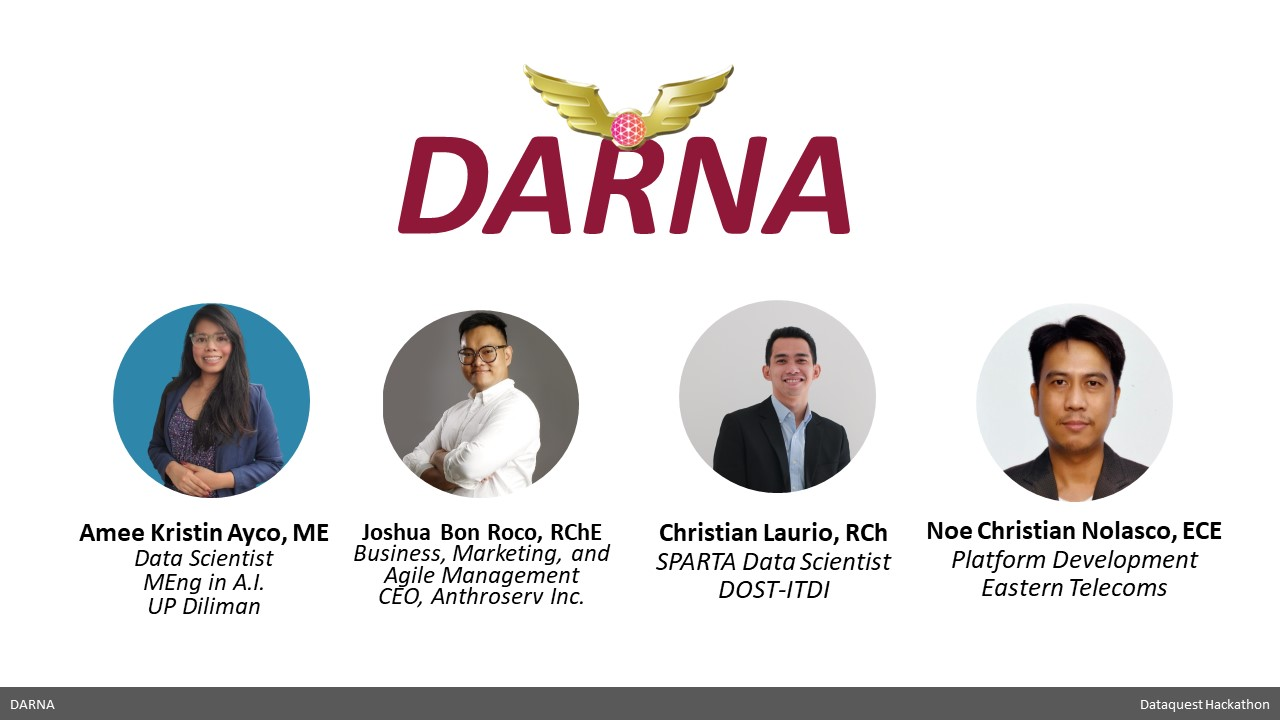